In [215]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

def mean(pdf):
    m = 0
    for i in range(len(pdf)):
        m = m + i*pdf[i]
    return m

def var(pdf,mean):
    delta = 0
    for i in range(len(pdf)):
        if pdf[i] != 0:
            delta = delta + (pow((i-mean),2)*pdf[i])
    return delta

def hist(img,dim,k0,k1,k2,k3,e):
    assert dim%2 != 0
    width = img.shape[1]
    height = img.shape[0]
    img_pdf = np.zeros([256])
    img_flat = img.flatten()
    for i in img_flat:
        img_pdf[i] += 1
    img_pdf = img_pdf/len(img_flat)
    img_mean = mean(img_pdf)
    img_var = var(img_pdf,img_mean)
    img_sd = math.sqrt(img_var)
    local = dim*dim
    local_mean = 0
    local_var = 0
    local_sd = 0
    for i in range(dim//2,height-dim//2):
        for j in range(dim//2,width-dim//2):
            local_pdf = np.zeros([256])
            for p in range(j-dim//2,j+dim//2+1):
                for q in range(i-dim//2,i+dim//2+1):
                    local_pdf[img[q,p]] += 1.0/local
            local_mean = mean(local_pdf)
            local_var = var(local_pdf,local_mean)
            local_sd = math.sqrt(local_var)
            if local_mean>=img_mean*k0 and local_mean<=img_mean*k1 and local_sd<=k3*img_sd and local_sd>=k2*img_sd:
                img[i,j] = img[i,j]*e
    return img

img1 = cv2.imread('hidden object.jpg',cv2.IMREAD_GRAYSCALE)
img2 = hist(img1,3,0,0.4,0,0.4,30)
cv2.imwrite('hsm.jpg',img2)

True

In [109]:
def mean(pdf):
    m = 0
    for i in range(len(pdf)):
        m = m + i*pdf[i]
    return m

def var(pdf,mean):
    delta = 0
    for i in range(len(pdf)):
        if pdf[i] != 0:
            delta = delta + (pow((i-mean),2)*pdf[i])
    return delta

def hist(img,dim,k0,k1,k2,k3,e):
    assert dim%2 != 0
    width = img.shape[0]
    height = img.shape[1]
    img_pdf = np.zeros([256])
    img_flat = img.flatten()
    for i in img_flat:
        img_pdf[i] += 1
    img_pdf = img_pdf/len(img_flat)
    img_mean = mean(img_pdf)
    img_var = var(img_pdf,img_mean)
    img_sd = math.sqrt(img_var)
    local = dim*dim
    local_mean = 0
    local_var = 0
    local_sd = 0
    for i in range(dim//2,height-dim//2-1):
        for j in range(dim//2,width-dim//2):
            local_pdf = np.zeros([256])
            for p in range(j-dim//2,j+dim//2+1):
                for q in range(i-dim//2,i+dim//2+1):
                    local_pdf[img[p,q]] += 1.0/local
            local_mean = mean(local_pdf)
            local_var = var(local_pdf,local_mean)
            local_sd = math.sqrt(local_var)
            if local_mean>=img_mean*k0 and local_mean<=img_mean*k1 and local_sd<=k3*img_sd and local_sd>=k2*img_sd:
                img[j,i] = img[j,i]*e
    return img
                
            

In [150]:
def hist2(img,dim,k0,k1,k2,k3,e):
    assert dim%2 != 0
#     img_enhance = np.zeros_like(img)
    width = img.shape[1]
    height = img.shape[0]
    img_pdf = np.zeros([256])
    img_flat = img.flatten()
    for i in img_flat:
        img_pdf[i] += 1
    img_pdf = img_pdf/len(img_flat)
    img_mean = mean(img_pdf)
    img_var = var(img_pdf,img_mean)
    img_sd = math.sqrt(img_var)
    local = dim*dim
    local_mean = 0
    local_var = 0
    local_sd = 0
    for i in range(dim//2,height-dim//2):
        for j in range(dim//2,width-dim//2):
            local_pdf = np.zeros([256])
            for p in range(j-dim//2,j+dim//2+1):
                for q in range(i-dim//2,i+dim//2+1):
                    local_pdf[img[q,p]] += 1.0/local
            local_mean = mean(local_pdf)
            local_var = var(local_pdf,local_mean)
            local_sd = math.sqrt(local_var)
            if local_mean>=img_mean*k0 and local_mean<=img_mean*k1 and local_sd<=k3*img_sd and local_sd>=k2*img_sd:
                img[i,j] = img[i,j]*e
    return img
                

In [140]:
img = cv2.imread('hidden object.jpg',cv2.IMREAD_GRAYSCALE)
width = img.shape[0]
height = img.shape[1]
img_pdf = np.zeros([256])
img_flat = img.flatten()
for i in img_flat:
    img_pdf[i] += 1
img_pdf = img_pdf/len(img_flat)
img_mean = mean(img_pdf)
img_var = var(img_pdf,img_mean)
img_sd = math.sqrt(img_var)

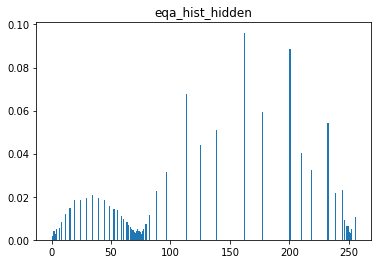

In [206]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('hidden object.jpg',cv2.IMREAD_GRAYSCALE)
img_flat = img.flatten()
img_eq = np.zeros([665,652])
hist_eqa = np.zeros([256])
mn = len(img_flat)

for i in img_flat:
    hist_eqa[i] += 1/mn
# hist_eqa = hist_eqa/len(img_flat)
for i in range(1,len(hist_eqa)):
    hist_eqa[i] = hist_eqa[i-1] + hist_eqa[i]
hist_eqa = np.around(255*hist_eqa)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_eq[i,j] = hist_eqa[img[i,j]]

cv2.imwrite('eqa_hidden.jpg',img_eq)
plt.hist(img_eq.flatten(),256,[0,256],density=True)
plt.title('eqa_hist_hidden')
plt.savefig('eqa_hist_hidden.jpg')
plt.show()

In [209]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

gray_img = cv2.imread('hidden object.jpg',cv2.IMREAD_GRAYSCALE)
clahe = cv2.createCLAHE()
clahe_img = clahe.apply(gray_img)
cv2.imshow("clahe_image", clahe_img)
cv2.waitKey(0)
cv2.imwrite('local_enhance.jpg',clahe_img)

True